In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

In [3]:
# seed
rand_state = 100 # For reproducibility

In [4]:
# loading the data
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/boston_clean.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.rename(|) 


In [ ]:
df.isnull()

ERROR: Error in parse(text = input): <text>:2:0: unexpected end of input
1: df.pd.concat(x, 
   ^


In [ ]:
# check the data type 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.shape

(506, 14)

In [ ]:
# drop column B
df.drop("B", axis=1, inplace=True)

In [ ]:
df.drop()

In [ ]:
# check for isnull
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
price      0
dtype: int64

In [ ]:
df.shape

(506, 13)

# Explanatory Data Analysis

In [ ]:
# convert the CHAS to category data 
df['CHAS']= df['CHAS'].astype('category')

In [ ]:
# check the info of the category data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  LSTAT    506 non-null    float64 
 12  price    506 non-null    float64 
dtypes: category(1), float64(12)
memory usage: 48.2 KB


### converting CHAS

In [ ]:
# convert the CHAS to dummny dataframe 
df['CHAS'] = pd.get_dummies(df['CHAS'], drop_first=True, dtype=float)

In [ ]:
# view the effect of the change 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Converting RAD

In [ ]:
# sort the RAD columns 
df.RAD.value_counts(

RAD
1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: count, dtype: int64

In [ ]:
# import the Ordinal encoder 
from sklearn.preprocessing import OrdinalEncoder


# Initialize and apply OrdinalEncoder
encoder = OrdinalEncoder()

In [ ]:
# convert the RAD to ordinal column
df['RAD'] = encoder.fit_transform(df[['RAD']])

In [ ]:
# check the impact of the code 
df.RAD.value_counts().sort_index()

RAD
0.0     20
1.0     24
2.0     38
3.0    110
4.0    115
5.0     26
6.0     17
7.0     24
8.0    132
Name: count, dtype: int64

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,0.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,0.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,0.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,0.0,273.0,21.0,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  price    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Removing outliers

In [ ]:
df.shape

(506, 13)

In [ ]:
categorics= ['CHAS', 'RAD']

In [ ]:
df.drop(categorics, axis=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48,22.0


In [ ]:
from scipy import stats

(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 )

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,price
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
501    True
502    True
503    True
504    True
505    True
Length: 506, dtype: bool

In [ ]:
# show me how to remove outliers from a dataset?
(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1).sum()

469

In [ ]:
df = df[(np.abs(stats.zscore(df.drop(categorics, axis=1))) <3 ).all(axis=1)]

In [ ]:
df.shape

(469, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     469 non-null    float64
 1   ZN       469 non-null    float64
 2   INDUS    469 non-null    float64
 3   CHAS     469 non-null    float64
 4   NOX      469 non-null    float64
 5   RM       469 non-null    float64
 6   AGE      469 non-null    float64
 7   DIS      469 non-null    float64
 8   RAD      469 non-null    float64
 9   TAX      469 non-null    float64
 10  PTRATIO  469 non-null    float64
 11  LSTAT    469 non-null    float64
 12  price    469 non-null    float64
dtypes: float64(13)
memory usage: 51.3 KB


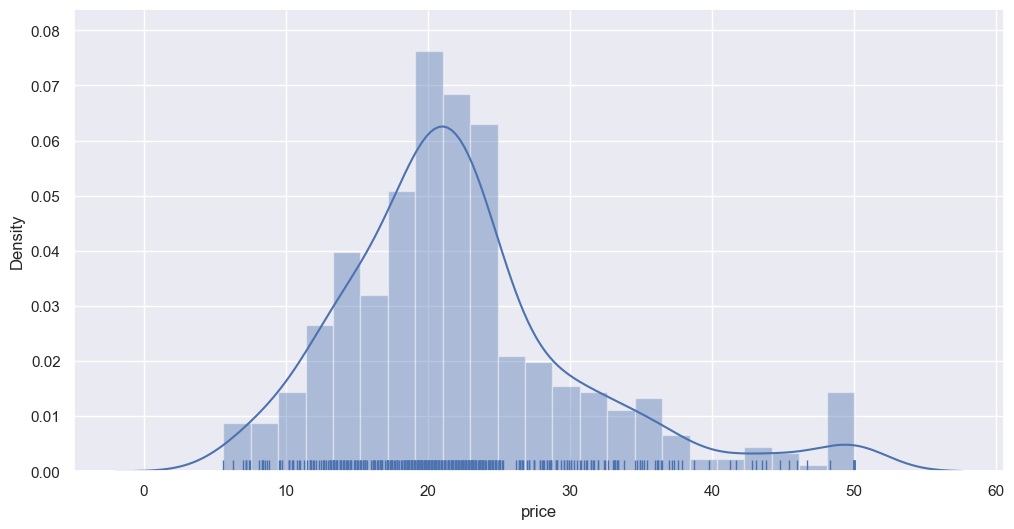

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'], rug=True)
plt.show()

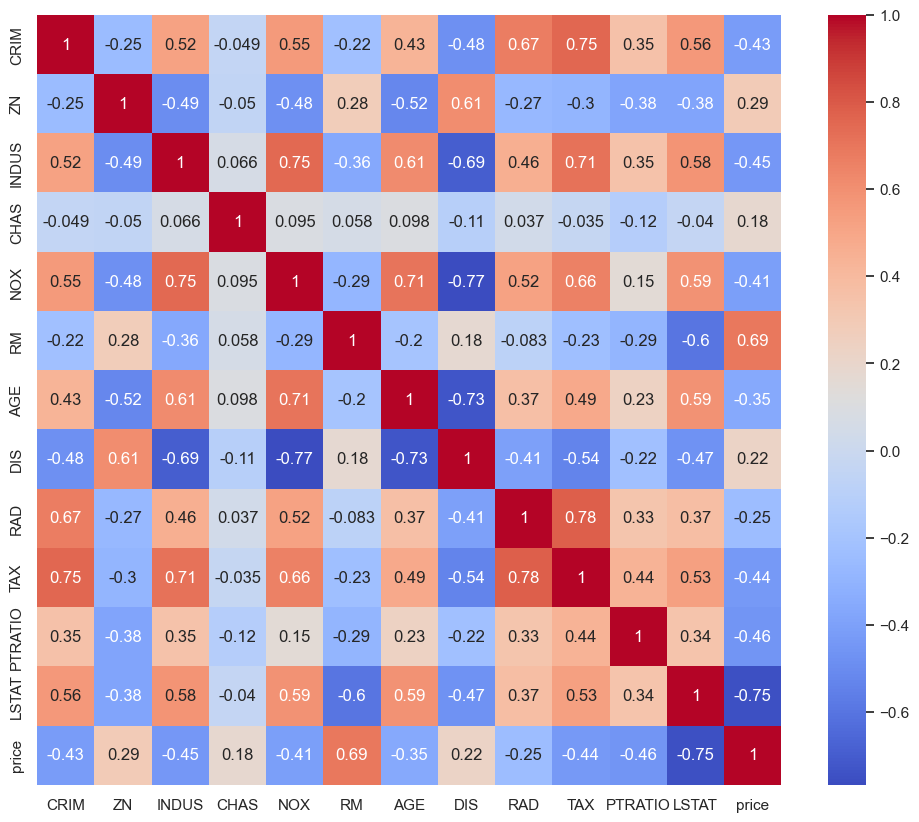

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

### Train and Test Split

In [ ]:
df.shape

(469, 13)

In [ ]:
y = df['price']
X = df.drop('price', axis=1 , inplace=False) # be careful to set inplace= False.

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 469, dtype: float64

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,1.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,1.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,2.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,0.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,0.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,0.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,0.0,273.0,21.0,6.48


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [ ]:
# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
344,0.03049,55.0,3.78,0.0,0.484,6.874,28.1,6.4654,4.0,370.0,17.6,4.61
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,8.0,666.0,20.2,13.11
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,3.0,307.0,21.0,18.35
51,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,3.0,243.0,16.8,9.43
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,0.0,265.0,15.6,4.38


### Scalling 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
344,0.03049,55.0,3.78,0.0,0.484,6.874,28.1,6.4654,4.0,370.0,17.6,4.61
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,8.0,666.0,20.2,13.11
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,3.0,307.0,21.0,18.35
51,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,3.0,243.0,16.8,9.43
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,0.0,265.0,15.6,4.38


In [ ]:
X_train_sc= scaler.fit_transform(X_train.drop(categorics, axis=1))
X_test_sc= scaler.transform(X_test.drop(categorics, axis=1))

In [ ]:
# note, X_train_sc and X_test_sc are not dataframes anymore. That's just fine. Sklearn handels np.arrays
X_train_sc[:2]

array([[-0.54596786,  2.45018568, -1.10848165, -0.62047642,  0.90570645,
        -1.47741913,  1.47407572, -0.20164071, -0.38135388, -1.1783183 ],
       [ 2.40023999, -0.47370587,  0.99825649,  0.51805742, -0.11120786,
         0.68846397, -0.90858522,  1.57429512,  0.84133614,  0.08031565]])

In [ ]:
X_test_sc

array([[-5.46326271e-01,  1.01482073e+00,  5.48073616e-01,
        -7.95635472e-01, -1.39586860e-01, -1.44849248e+00,
        -3.54142524e-03, -8.01619038e-01, -9.91946474e-02,
        -9.41398970e-01],
       [-5.49156468e-01,  3.77922729e+00, -1.36888155e+00,
        -1.04961610e+00,  5.28896342e-01, -1.41956583e+00,
         2.46562834e+00, -7.41621206e-01, -6.63513122e-01,
        -9.73975379e-01],
       [-4.40914838e-01,  5.89527418e-01, -1.08052912e+00,
         1.76497267e-01,  1.84536680e+00, -5.91540401e-01,
        -4.22573484e-01, -8.37617737e-01, -2.54457470e+00,
        -1.39302645e+00],
       [ 2.65606998e+00, -4.73705872e-01,  9.98256487e-01,
         2.20287030e-01, -5.88921088e-01,  7.37726061e-02,
        -4.03361030e-01,  1.57429512e+00,  8.41336144e-01,
         8.23650062e-01],
       [-5.08913709e-01,  5.89527418e-01, -1.17468502e+00,
        -9.80428272e-01,  8.07956547e-01, -1.32917004e+00,
         2.25952389e-01, -1.12560733e+00, -1.65107045e+00,
        -1.

### Linear Regression 

In [ ]:
# recall, we imported the LinearRegression model from the sklearn.linear_model already!
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)

In [ ]:
reg_model = LinearRegression()

In [ ]:
reg_model.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
y_pred = reg_model.predict(X_test_sc)

In [ ]:
y_pred

array([27.84824157, 25.56075226, 39.89416907, 15.93206459, 34.28152602,
       14.30070222, 18.2363492 , 25.24842801, 11.39793359, 24.03502925,
       29.12242385, 29.16926012,  9.87945634, 27.58544979, 17.17690487,
       24.84019355, 23.52968801, 16.8069704 , 11.90367304, 12.37424418,
        1.08578504, 27.85863727, 15.6710056 , 15.36398798, 16.49755545,
       16.75262946, 22.01329728, 25.31591626, 16.31115566, 19.49955535,
       25.1661459 , 19.82071339, 19.64509003, 20.22771133, 25.66311965,
       20.71234382, 13.16275699, 24.92226943, 25.99881405, 11.6510212 ,
       12.96240516, 12.05038086, 33.32343705, 18.93383684, 15.55221701,
       21.92039   , 17.07453492, 33.59357864, 17.2427932 , 13.67788736,
       21.11836336, 18.48813252, 26.22014413, 17.64690337, 26.93507681,
       38.07287862, 18.78988848, 25.00385346,  5.61811337, 15.05777823,
       25.22871949, 34.30524056, 33.99830095, 18.18000817, 17.77055918,
       20.78377879, 19.1934287 , 28.70397445, 17.08066094, 20.72

In [ ]:
test_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_pred, 'resid': y_test - y_pred})
test_predictions.head()

,actuals,predictions,resid
93,25.0,27.848242,-2.848242
348,24.5,25.560752,-1.060752
268,43.5,39.894169,3.605831
468,19.1,15.932065,3.167935
279,35.1,34.281526,0.818474


### Evaluation Metrics 

In [ ]:
# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 3.21


In [ ]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 19.01


In [ ]:
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 4.36


In [ ]:
# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
# Adjusted R-squared

R-squared: 0.69


In [ ]:
# Adjusted R-squared
n = len(y_test)
p = X_test_sc.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adj_r2:.2f}')


Adjusted R-squared: 0.65


In [ ]:
# F-statistic
from sklearn.metrics import mean_squared_error
mse_model = mean_squared_error(y_test, y_pred)
mse_null = mean_squared_error(y_test, [y_test.mean()] * len(y_test))
f_statistic = (mse_null - mse_model) / mse_model * (len(y_test) - X_test_sc.shape[1] - 1)
print(f'F-statistic: {f_statistic:.2f}')

F-statistic: 182.67


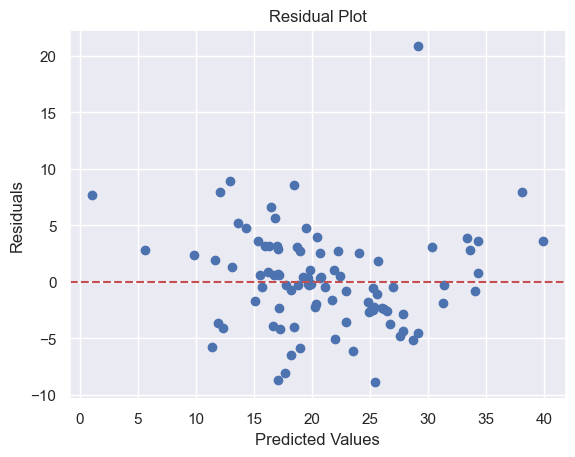

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

### Cross Validation 

In [ ]:
R2 = cross_val_score(estimator=LinearRegression(), X=X_train_sc, y=y_train, cv=5, scoring="r2")
R2.mean()
R2.std()
# cross_val_score


0.15402869055859397

### Pycares

In [ ]:
# let's double ckeck the Pycaret version:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from pycaret.regression import *

In [ ]:
setup(data=df, 
      target='price', 
      session_id=rand_state, 
      train_size=0.8,
      fold_strategy='kfold',
        fold=5,
        normalize=True,
        normalize_method='zscore')

,Description,Value
0,Session id,100
1,Target,price
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(404, 14)"
6,Transformed test set shape,"(102, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
linear_model = create_model('lr')
linear_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6593,31.2120,5.5868,0.6225,0.2165,0.1639
1,3.7153,26.0174,5.1007,0.7158,0.3001,0.1923
2,2.6668,13.4972,3.6739,0.7986,0.2642,0.1461
3,3.1416,19.7619,4.4454,0.6952,0.1763,0.1322
4,3.9439,28.0635,5.2975,0.7007,0.2713,0.2200
Mean,3.4254,23.7104,4.8209,0.7066,0.2457,0.1709
Std,0.4612,6.3316,0.6854,0.0562,0.0439,0.0317


LinearRegression(n_jobs=-1)

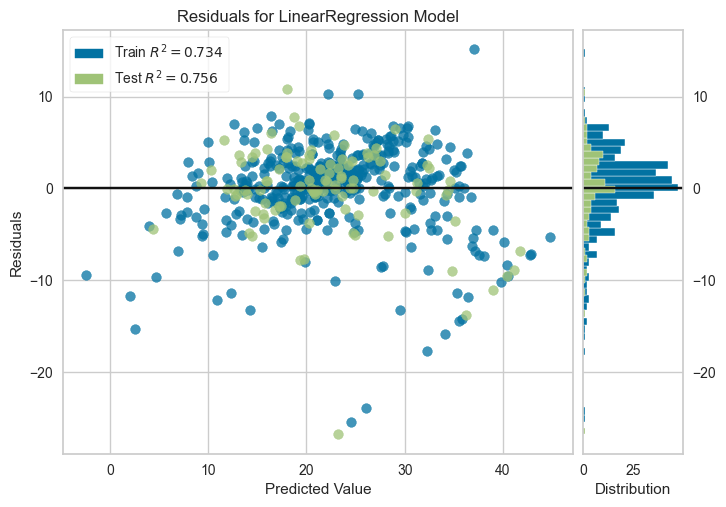

In [ ]:
plot_model(linear_model, plot='residuals')

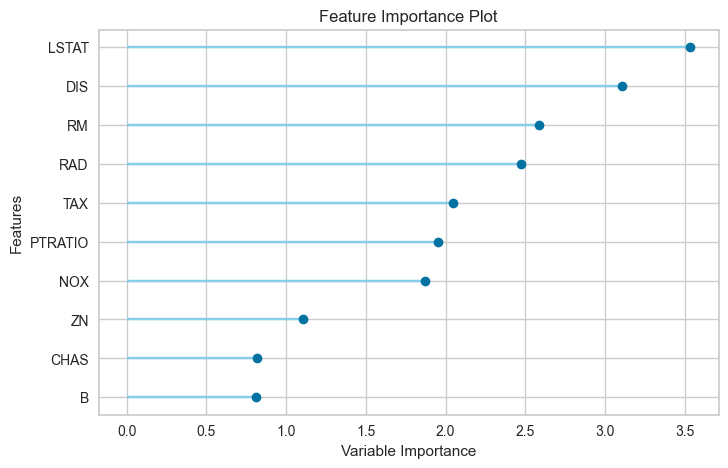

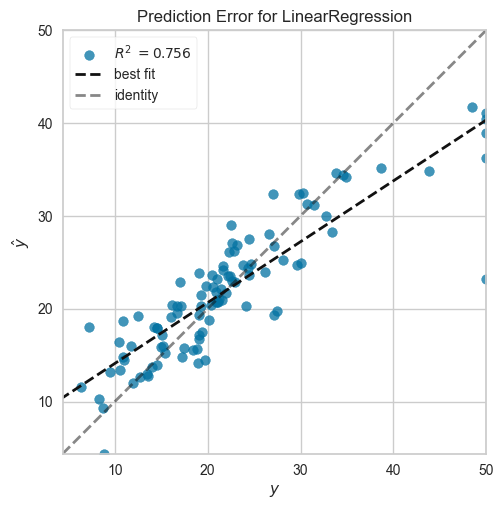

In [ ]:
plot_model(linear_model, plot='error')

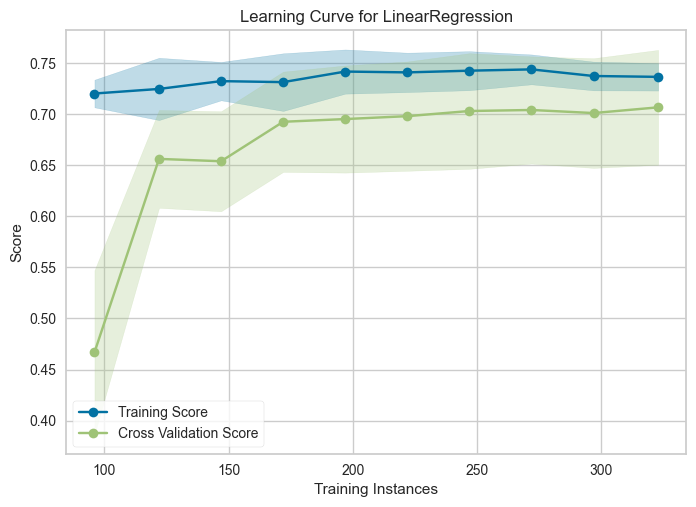

In [ ]:
plot_model(linear_model, plot='learning')

In [ ]:
pycaret_predictions = predict_model(linear_model)
pycaret_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.2485,23.6170,4.8597,0.7555,0.2128,0.1676


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,prediction_label
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.299999,7.3090,2.0,329.0,12.6,392.200012,6.62,34.599998,34.408104
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.400000,3.3751,8.0,307.0,17.4,380.339996,3.76,31.500000,31.185246
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.0,396.899994,9.08,20.600000,22.312864
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.000000,4.1750,4.0,307.0,21.0,376.730011,13.04,14.500000,17.886141
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.699997,3.9450,4.0,304.0,18.4,396.420013,11.50,16.200001,20.435724
